In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Pre_Processed_TSLA.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,44.57,44.65,42.65,43.86,43.86,23822000.0
1,2015-01-05,42.91,43.30,41.43,42.02,42.02,26842500.0
2,2015-01-06,42.01,42.84,40.84,42.26,42.26,31309500.0
3,2015-01-07,42.67,42.96,41.96,42.19,42.19,14842000.0
4,2015-01-08,42.56,42.76,42.00,42.12,42.12,17212500.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj. Close,Volume
1544,2021-02-22,762.64,768.50,710.20,714.50,714.50,37011700.0
1545,2021-02-23,662.13,713.61,619.00,698.84,698.84,66397000.0
1546,2021-02-24,711.85,745.00,694.17,742.02,742.02,36677100.0
1547,2021-02-25,726.15,737.21,670.58,682.22,682.22,38619900.0
1548,2021-02-26,700.00,706.70,659.51,675.50,675.50,41011300.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [6]:
# Change Dtype of Date column
df["Date"] = pd.to_datetime(df["Date"])
     

In [7]:
from statsmodels.tsa.stattools import adfuller

**ADF Test**






ADF (Augmented Dickey-Fuller) Test
One of the most widely used statistical tests is the Dickey-Fuller test. It can be used to determine whether or not a series has a unit root, and thus whether or not the series is stationary. This test’s null and alternate hypotheses are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).

In [8]:
def Test_Stationarity(timeseries):
  result = adfuller(timeseries['Adj. Close'], autolag = 'AIC')
  print("Results of Dickey Fuller Test")
  print(f'Test Statistics: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'Number of lags used: {result[2]}')
  print(f'Number of observations used: {result[3]}')
  for key, value in result[4].items():
    print(f'critical value ({key}): {value}')

In [9]:
Test_Stationarity(df)

Results of Dickey Fuller Test
Test Statistics: 0.3998006273481117
p-value: 0.9814874842817938
Number of lags used: 24
Number of observations used: 1524
critical value (1%): -3.4346481290263013
critical value (5%): -2.8634383565975736
critical value (10%): -2.567780658251872


Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

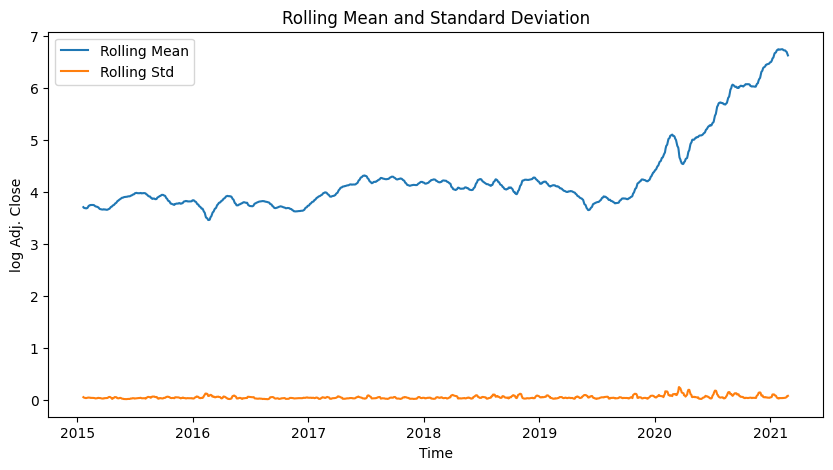

In [10]:
df['log Adj. Close'] = np.log(df['Adj. Close'])
TSLA_log_moving_avg = df['log Adj. Close'].rolling(12).mean()
TSLA_log_std = df['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(df['Date'], TSLA_log_moving_avg, label = "Rolling Mean")
plt.plot(df['Date'], TSLA_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

**TRAIN_TEST SPLIT**

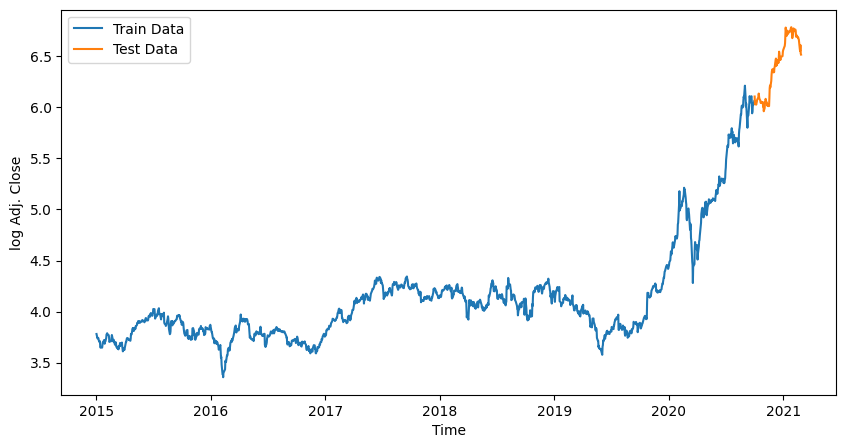

In [11]:

TSLA_Train_Data = df[df['Date'] < '2020-10-01']
TSLA_Test_Data = df[df['Date'] >= '2020-10-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(TSLA_Train_Data['Date'], TSLA_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(TSLA_Test_Data['Date'], TSLA_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

**MODEL BUILDING**

AUTO-ARIMA- to determine the order of differencing, d, and then fitting models within start p, max p, start q, max q ranges

 the Auto ARIMA model assigned the values 5, 2, and 2 to, p, d, and q, respectively.

In [13]:
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
TSLA_ARIMA_Model = ARIMA(TSLA_Train_Data['log Adj. Close'], order=(5, 2, 2))
TSLA_ARIMA_Model_Fit = TSLA_ARIMA_Model.fit()
print(TSLA_ARIMA_Model_Fit.summary())


                               SARIMAX Results                                
Dep. Variable:         log Adj. Close   No. Observations:                 1447
Model:                 ARIMA(5, 2, 2)   Log Likelihood                2810.889
Date:                Mon, 17 Apr 2023   AIC                          -5605.778
Time:                        16:24:52   BIC                          -5563.571
Sample:                             0   HQIC                         -5590.025
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8604      0.453     -1.900      0.057      -1.748       0.027
ar.L2          0.0428      0.022      1.924      0.054      -0.001       0.086
ar.L3          0.0678      0.028      2.452      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Forcasting**

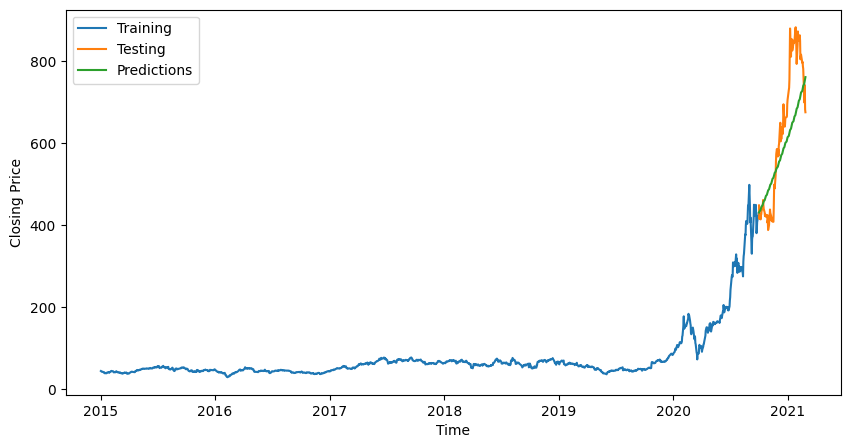

In [16]:
TSLA_output = TSLA_ARIMA_Model_Fit.forecast(102, alpha=0.05)
TSLA_predictions = np.exp(TSLA_output)
plt.figure(figsize=(10, 5))
plt.plot(TSLA_Train_Data['Date'], TSLA_Train_Data['Adj. Close'], label = 'Training')
plt.plot(TSLA_Test_Data['Date'], TSLA_Test_Data['Adj. Close'], label = 'Testing')
plt.plot(TSLA_Test_Data['Date'], TSLA_predictions, label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
     

**RMSE & MAPE**

In [17]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
rmse = math.sqrt(mean_squared_error(TSLA_Test_Data['Adj. Close'], TSLA_predictions))
mape = np.mean(np.abs(TSLA_predictions - TSLA_Test_Data['Adj. Close'])/np.abs(TSLA_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 102.6015612699401
MAPE: nan


the RMSE value is 102.60, which means that on average, the predicted values are off by about 102.60 from the actual values.

MAPE stands for Mean Absolute Percentage Error, which is another measure of the difference between actual and predicted values. It is calculated by taking the mean of the absolute percentage differences between the actual and predicted values. MAPE is expressed in percentage and a lower value indicates better accuracy of the model.